# Star Wars Movies Analysis
A survey data available publicly on Star Wars movies was collected by [FiveThirtyEight](https://fivethirtyeight.com/) and it contains data by 1186 respondents. This survey tries tries to examine: How many people are“Star Wars fans? What are the most like Star Wars movies? Which characters are most well-liked?

Goals of this project are:
- To find Highest-Ranked movie
- To find the most viewed movie
- Compare the data for Star Wars Fans vs Non Fans, Star Trek Fans vs Non Fans and Males vs Females

The data has several columns, including the following:

- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response


There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes.

[Data Source](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 

%matplotlib inline

### Loading the data

In [2]:
rawdata = open('data/star_wars.csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

Detected encoding: ascii


In [3]:
# Import the dataset with the detected encoding
df = pd.read_csv('data/star_wars.csv', encoding=encoding)
# Display the first few rows of the DataFrame
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
# Display the columns of the DataFrame
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning and mapping Yes/No Columns

In [5]:
# Convert the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column to boolean
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})
# Convert the 'Have you seen any of the 6 films in the Star Wars franchise?' column to boolean
df['Have you seen any of the 6 films in the Star Wars franchise?'] = df['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes': True, 'No': False})


In [6]:
# Convert the column 32 to boolean
df['Do you consider yourself to be a fan of the Star Trek franchise?'] = df['Do you consider yourself to be a fan of the Star Trek franchise?'].map({'Yes': True, 'No': False})

### Cleaning and mapping Checkbox Columns

In [7]:
# Rename the columns 3 to 8 with their respective film names
film_names = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
df.rename(columns=dict(zip(df.columns[3:9], film_names)), inplace=True)
# Convert columns 3 to 8 to boolean, treating NaN as False and non-NaN as True
for i in range(3, 9):
    df.iloc[:, i] = df.iloc[:, i].notna()
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
# Display the data types of the columns
df.dtypes

RespondentID                                                                                                                                       int64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                        bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             object
seen_1                                                                                                                                            object
seen_2                                                                                                                                            object
seen_3                                                                                                                                            object
seen_4                                                                            

### Cleaning the Ranking Columns

In [9]:
# Rename the columns 9 to 14 with their respective film names
film_names = ['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6']
df.rename(columns=dict(zip(df.columns[9:15], film_names)), inplace=True)


### Rankings

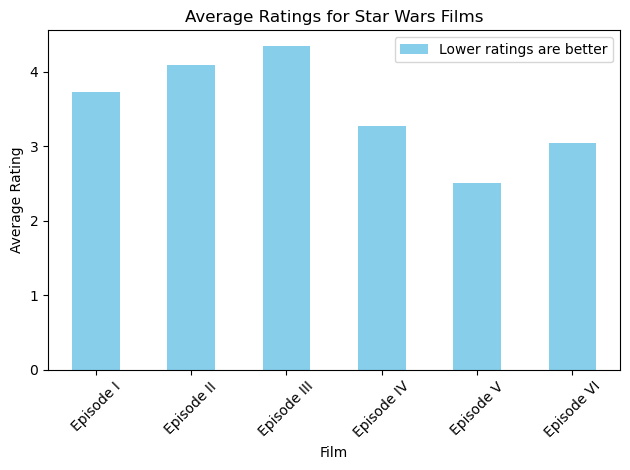

In [10]:
# Compute the average rating for each film
average_ratings = df[film_names].mean()
# Display the average ratings in a bar chart
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings for Star Wars Films')
plt.xlabel('Film')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
# Add legend saying lower ratings are better
plt.legend(['Lower ratings are better'])
plt.tight_layout()
plt.show()

We can observe that the average ratings for the Star Wars films IV, V, and VI are significantly higher than those for I, II, and III. This suggests that the original trilogy is generally more well-received by fans compared to the prequel trilogy. Episode V is the most highly rated movie.

### View Counts

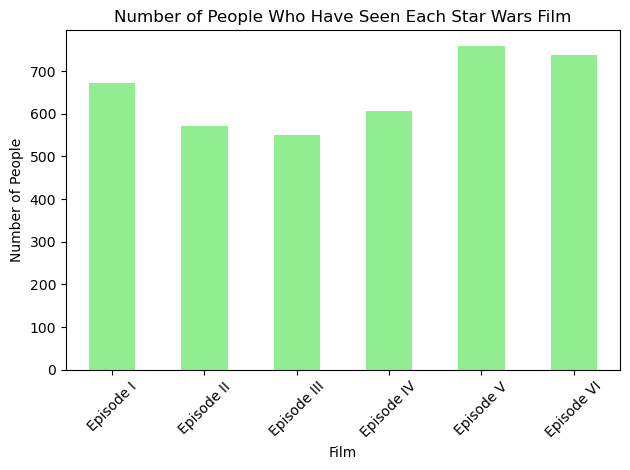

In [11]:
# Compute the sum of columns 3 to 8
seen_counts = df.iloc[:,3:9].sum()
# Display the sum of seen counts in a bar chart
seen_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of People Who Have Seen Each Star Wars Film')
plt.xlabel('Film')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.tight_layout()
plt.show()

From the above analysis, we can see that:
- The average ratings for the Star Wars films vary, with "Episode V" receiving the highest average rating and "Episode III" receiving the lowest.
- The number of people who have seen each film also varies, with "Episode V" being the most seen film and "Episode III" being the least seen.

### Star Wars Fans vs Non-Fans

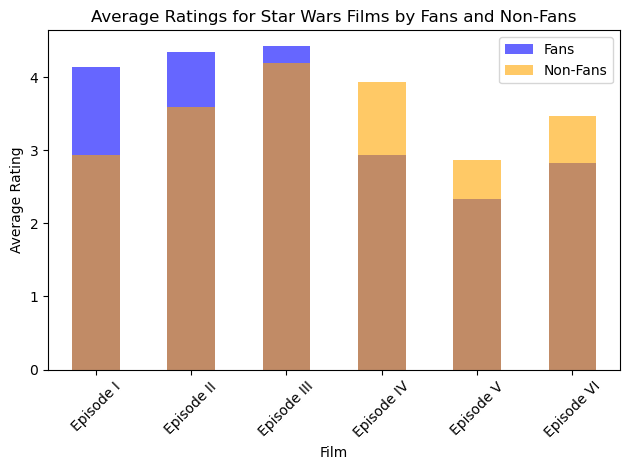

In [12]:
# Group the DataFrame by the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column
grouped = df.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')
# Compute the average ratings for fans and non-fans
average_ratings_fans = grouped[film_names].mean().loc[True]
average_ratings_non_fans = grouped[film_names].mean().loc[False]
# Compare average ratings for fans and non-fans in a bar chart
average_ratings_fans.plot(kind='bar', color='blue', alpha=0.6, label='Fans')
average_ratings_non_fans.plot(kind='bar', color='orange', alpha=0.6, label='Non-Fans')
plt.title('Average Ratings for Star Wars Films by Fans and Non-Fans')
plt.xlabel('Film')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


We can observe from the bar chart that fans tend to rate the "original trilogy" (Episodes IV, V, and VI) higher than the prequel trilogy (Episodes I, II, and III). Non-fans, on the other hand, show a more consistent rating across all films, with slightly worse(higher is worse) ratings for the prequels. This suggests that fans have a stronger emotional connection to the original trilogy, while non-fans may not differentiate as much between the films.

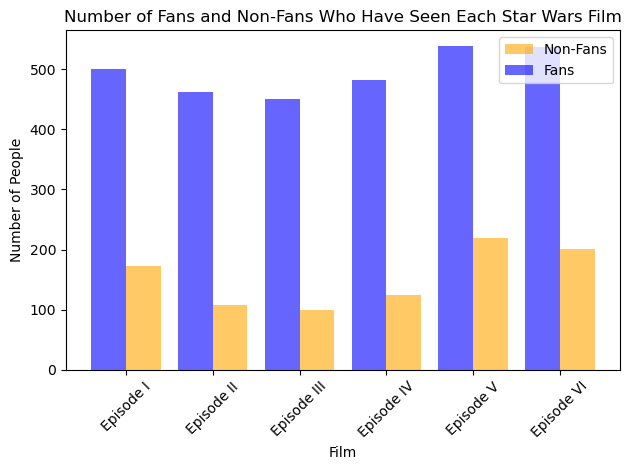

In [13]:
# Compute the number of fans and non-fans who have seen each film by summing columns 3 to 8
film_names_seen = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
seen_counts_fans = grouped[film_names_seen].sum().loc[True]
seen_counts_non_fans = grouped[film_names_seen].sum().loc[False]
# Compare the number of fans and non-fans who have seen each film in a bar chart side by side
#seen_counts_fans.plot(kind='bar', color='blue', alpha=0.6, label='Fans', stacked=False)
#seen_counts_non_fans.plot(kind='bar', color='orange', alpha=0.6, label='Non-Fans', stacked=False)
# Offset the plots to avoid overlap
plt.bar(np.arange(len(film_names_seen)) + 0.2, seen_counts_non_fans, width=0.4, color='orange', alpha=0.6, label='Non-Fans')
plt.bar(np.arange(len(film_names_seen)) - 0.2, seen_counts_fans, width=0.4, color='blue', alpha=0.6, label='Fans')
plt.title('Number of Fans and Non-Fans Who Have Seen Each Star Wars Film')
plt.xlabel('Film')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names_seen)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


We can observe that the number of fans who have seen each film is generally higher than that of non-fans. This suggests that fans are more likely to have seen the films compared to non-fans.

### Star Trek Fans vs Non-Fans

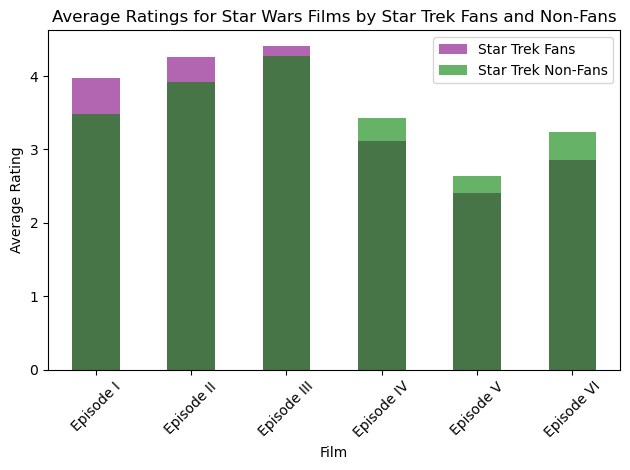

In [14]:
# Group by the 'Do you consider yourself to be a fan of the Star Trek film franchise?' column
grouped_star_trek = df.groupby('Do you consider yourself to be a fan of the Star Trek franchise?')
# Compute the average ratings for Star Trek fans and non-fans
average_ratings_star_trek_fans = grouped_star_trek[film_names].mean().loc[True]
average_ratings_star_trek_non_fans = grouped_star_trek[film_names].mean().loc[False]
# Compare average ratings for Star Trek fans and non-fans in a bar chart
average_ratings_star_trek_fans.plot(kind='bar', color='purple', alpha=0.6, label='Star Trek Fans')
average_ratings_star_trek_non_fans.plot(kind='bar', color='green', alpha=0.6, label='Star Trek Non-Fans')
plt.title('Average Ratings for Star Wars Films by Star Trek Fans and Non-Fans')
plt.xlabel('Film')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the above analysis, we can see that:
- Fans of the Star Trek franchise tend to rate the original trilogy (Episodes IV, V, and VI) higher than the prequel trilogy (Episodes I, II, and III). This is similar to the trend observed among Star Wars fans, where the original trilogy is generally preferred over the prequels.
- Non-fans of the Star Trek franchise show a more consistent rating across all films, similar to the non-fans of the Star Wars franchise.

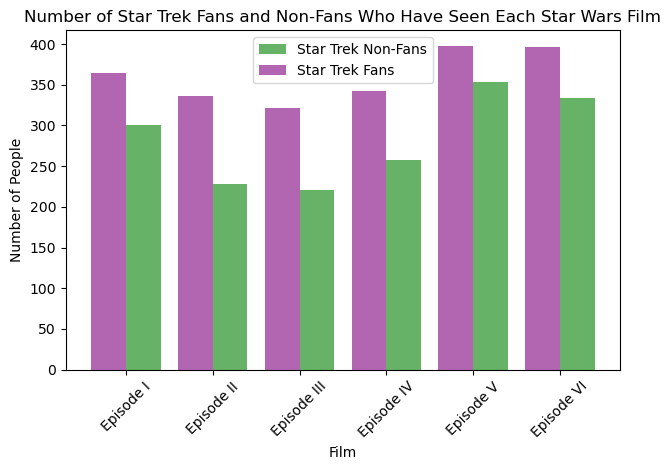

In [15]:
# Compute the number of fans and non-fans who have seen each film by summing columns 3 to 8
film_names_seen = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
seen_counts_star_trek_fans = grouped_star_trek[film_names_seen].sum().loc[True]
seen_counts_star_trek_non_fans = grouped_star_trek[film_names_seen].sum().loc[False]
# Compare the number of Star Trek fans and non-fans who have seen each film in a bar chart side by side
plt.bar(np.arange(len(film_names_seen)) + 0.2, seen_counts_star_trek_non_fans, width=0.4, color='green', alpha=0.6, label='Star Trek Non-Fans')
plt.bar(np.arange(len(film_names_seen)) - 0.2, seen_counts_star_trek_fans, width=0.4, color='purple', alpha=0.6, label='Star Trek Fans')
plt.title('Number of Star Trek Fans and Non-Fans Who Have Seen Each Star Wars Film')
plt.xlabel('Film')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names_seen)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the above analysis, we can see that:
- Number of Star Trek fans who have seen each film is generally higher than the number of non-fans, indicating that fans are more likely to have watched the films.
- Fans tend to rate the "original trilogy" (Episodes IV, V, and VI) higher than the prequel trilogy (Episodes I, II, and III). Non-fans, on the other hand, show a more consistent rating across all films, with slightly lower ratings for the prequels.
- Star Trek fans tend to rate the films higher than Star Trek non-fans, indicating that Star Trek fans may have a more positive perception of the Star Wars films.

### Male vs Female

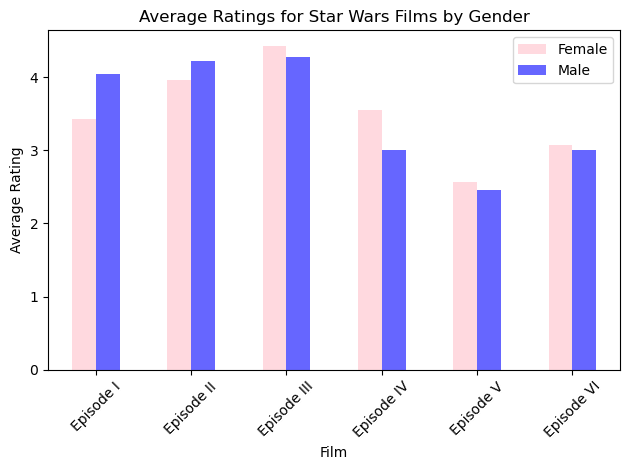

In [16]:
# Group df by the Gender column
grouped_gender = df.groupby('Gender')
# Compute the average ratings of each film for males
average_ratings_gender = grouped_gender[film_names].mean()
# Compare average ratings for males vs females in a bar chart
average_ratings_gender.T.plot(kind='bar', color=['pink', 'blue'], alpha=0.6)
plt.title('Average Ratings for Star Wars Films by Gender')
plt.xlabel('Film')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

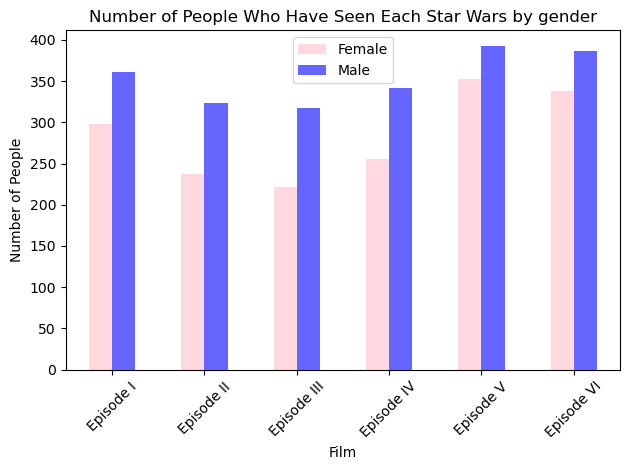

In [17]:
# Compute the number of people who have seen each film by summing columns 3 to 8
seen_counts_gender = grouped_gender[film_names_seen].sum()
# Compare the number of views by gender in a bar chart
seen_counts_gender.T.plot(kind='bar', color=['pink', 'blue'], alpha=0.6)
plt.title('Number of People Who Have Seen Each Star Wars by gender')
plt.xlabel('Film')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
# Change the x-axis labels to match the film names
plt.xticks(ticks=np.arange(len(film_names_seen)), labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

We can observe from the bar chart that males tend to rate the "original trilogy" (Episodes IV, V, and VI) better(lower is better) than the females.
Number of views for each film is higher for males compared to females, indicating that amongst the respondents of the survey we have more male viewers of Star Wars films compared to females.

## Conclusion

From the analysis we can conclude that:
1. **Average Ratings**: The original trilogy (Episodes IV, V, and VI) received higher average ratings compared to the prequel trilogy (Episodes I, II, and III). This suggests a stronger emotional connection to the original films among fans. Episode V is the highest rated movie.
2. **View Counts**: The original trilogy also had a higher number of viewers compared to the prequels, indicating that these films are more popular among the respondents. Episode V has the highest view count.
3. **Star Trek Fans vs Non-Fans**: Star Trek fans tend to rate the films higher than those who are not Star Trek fans, indicating a potential crossover interest in both franchises.
4. **Males vs Females**: Males tend to rate the "original trilogy" higher than the females. Far more males watched the prequel trilogy (Episodes I, II and III) but liked them much less than the females did.

### Author
Puneet Pawar